In [ ]:

import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
data=pd.read_csv('TATAm.csv')
data = data.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})


In [ ]:
data.head()

,date,open,close,high,low,volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
0,16-01-2015,522.008343,516.749939,526.627909,513.457282,4250137,500.500845,63.548102,496.679462,527.885876,465.473047,12.310588
1,19-01-2015,517.487074,529.281616,530.362777,514.194417,4617341,503.241871,67.935851,499.264441,532.320336,466.208546,12.816068
2,20-01-2015,529.527403,549.627319,551.396492,525.595849,6140342,507.659533,72.154546,502.434235,541.786614,463.081855,14.121897
3,21-01-2015,547.317485,542.059082,548.890083,536.653217,6521363,510.935680,67.867949,505.547510,547.146032,463.948987,14.490476
4,22-01-2015,541.223611,556.802307,558.964629,539.159577,6010572,515.303930,68.221174,509.604353,554.617877,464.590829,14.490474


In [ ]:
data.tail()

,date,open,close,high,low,volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
2443,12-12-2024,799.200012,786.349976,802.000000,785.5,10602758,800.567537,48.079297,789.139996,810.953183,767.326810,17.089286
2444,13-12-2024,789.000000,790.299988,792.500000,775.0,14101869,799.589675,47.361816,789.342496,811.117881,767.567111,17.157144
2445,16-12-2024,791.400024,784.799988,793.950012,783.0,10015361,798.181133,50.808619,789.867496,810.597032,769.137959,16.392861
2446,17-12-2024,785.500000,779.750000,796.349976,778.0,10270253,796.425787,48.180239,790.259994,809.821464,770.698525,16.789285
2447,18-12-2024,774.000000,755.700012,774.250000,754.0,19085263,792.547142,41.200449,788.884994,813.697254,764.072735,17.196429


In [ ]:
data.shape

(2448, 12)

In [ ]:
data.describe()

,open,close,high,low,volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
count,2448.000000,2448.000000,2448.000000,2448.000000,2.448000e+03,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,416.581829,415.643472,421.843300,410.168225,2.345971e+07,414.503485,50.820625,414.535193,446.009697,383.060690,11.662157
std,226.939596,226.322515,228.714256,224.189430,3.005852e+07,223.968829,17.895394,224.455901,236.152650,213.995054,5.395583
min,66.089433,64.896851,66.486971,63.107960,1.154721e+06,77.005883,5.457425,71.095835,78.810428,44.086796,3.368360
25%,263.699343,264.755264,269.053566,258.568714,7.432418e+06,263.086194,38.218626,260.906061,285.871353,243.806155,8.064188
50%,408.553714,407.493545,413.754664,402.499567,1.240520e+07,410.134582,50.036829,409.565681,437.773108,377.089210,10.732923
75%,498.900703,496.341614,504.689743,489.583600,2.661654e+07,488.810319,64.884275,493.041476,528.189035,455.606482,13.541291
max,1167.000000,1161.849976,1179.000000,1145.300049,3.905778e+08,1081.632516,96.017431,1083.834995,1176.308240,1045.974709,39.857143


In [ ]:
data.isnull().sum()

date         0
open         0
close        0
high         0
low          0
volume       0
EMA          0
RSI          0
BB_Middle    0
BB_Upper     0
BB_Lower     0
ADX          0
dtype: int64

In [ ]:
data['date'] = pd.to_datetime(data.date)
data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12636\2485596811.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,date,open,close,high,low,volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
0,2015-01-16,522.008343,516.749939,526.627909,513.457282,4250137,500.500845,63.548102,496.679462,527.885876,465.473047,12.310588
1,2015-01-19,517.487074,529.281616,530.362777,514.194417,4617341,503.241871,67.935851,499.264441,532.320336,466.208546,12.816068
2,2015-01-20,529.527403,549.627319,551.396492,525.595849,6140342,507.659533,72.154546,502.434235,541.786614,463.081855,14.121897
3,2015-01-21,547.317485,542.059082,548.890083,536.653217,6521363,510.935680,67.867949,505.547510,547.146032,463.948987,14.490476
4,2015-01-22,541.223611,556.802307,558.964629,539.159577,6010572,515.303930,68.221174,509.604353,554.617877,464.590829,14.490474


In [ ]:
print("Starting date: ",data.iloc[0][0])
print("Ending date: ", data.iloc[-1][0])
print("Duration: ", data.iloc[-1][0]-data.iloc[0][0])

Starting date:  2015-01-16 00:00:00
Ending date:  2024-12-18 00:00:00
Duration:  3624 days 00:00:00


C:\Users\USER\AppData\Local\Temp\ipykernel_12636\3195089649.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_12636\3195089649.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_12636\3195089649.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



EDA

In [ ]:
y_2014 = data.loc[(data['date'] >= '2015-01-01')
                     & (data['date'] < '2016-01-01')]

y_2014.drop(y_2014[['volume']],axis=1)

,date,open,close,high,low,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
0,2015-01-16,522.008343,516.749939,526.627909,513.457282,500.500845,63.548102,496.679462,527.885876,465.473047,12.310588
1,2015-01-19,517.487074,529.281616,530.362777,514.194417,503.241871,67.935851,499.264441,532.320336,466.208546,12.816068
2,2015-01-20,529.527403,549.627319,551.396492,525.595849,507.659533,72.154546,502.434235,541.786614,463.081855,14.121897
3,2015-01-21,547.317485,542.059082,548.890083,536.653217,510.935680,67.867949,505.547510,547.146032,463.948987,14.490476
4,2015-01-22,541.223611,556.802307,558.964629,539.159577,515.303930,68.221174,509.604353,554.617877,464.590829,14.490474
...,...,...,...,...,...,...,...,...,...,...,...
230,2015-12-24,378.395149,379.885284,382.219837,375.116862,384.878036,35.164873,390.023151,422.038616,358.007685,10.274842
231,2015-12-28,382.368833,391.408997,392.402420,381.226402,385.500032,46.318834,388.848428,418.668926,359.027931,10.526745
232,2015-12-29,390.316215,389.273132,394.885971,386.193512,385.859375,42.338444,387.276337,413.066051,361.486622,10.377731
233,2015-12-30,389.422133,390.862610,392.402405,387.931998,386.335873,49.596781,386.089197,408.553516,363.624878,9.827800


In [ ]:
monthvise= y_2014.groupby(y_2014['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,556.438650,560.969739
February,564.179086,563.165168
March,549.201346,546.095907
April,538.300929,535.032169
May,503.616182,502.622760
June,438.610140,436.846817
July,399.583117,397.512046
August,353.285148,352.596848
September,323.868576,322.423140


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2014.groupby(y_2014['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2014.groupby(data['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2014, x=y_2014.date, y=[y_2014['open'], y_2014['close'],
                                          y_2014['high'], y_2014['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
y_2020 = data.loc[(data['date'] >= '2020-01-01')
                     & (data['date'] < '2021-01-01')]

y_2020.drop(y_2020[['volume']],axis=1)

,date,open,close,high,low,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
1218,2020-01-01,184.006893,183.311218,185.547327,182.466475,173.838954,73.767049,172.413923,188.125476,156.702370,6.342736
1219,2020-01-02,183.857824,192.553802,193.497934,183.460300,175.621321,72.466963,173.623906,191.585285,155.662526,6.179465
1220,2020-01-03,191.709056,189.920181,194.442078,188.081597,176.983117,66.107411,174.866189,193.750960,155.981417,6.033940
1221,2020-01-06,189.820791,184.503815,189.820791,183.907528,177.699374,61.053725,176.066234,194.140888,157.991580,6.069434
1222,2020-01-07,185.845480,183.559677,188.230657,181.174501,178.257498,55.102054,177.268763,193.843211,160.694314,6.161718
...,...,...,...,...,...,...,...,...,...,...,...
1464,2020-12-24,170.938098,174.863709,176.901055,170.938098,172.387031,40.909089,177.246404,189.165580,165.327227,6.353389
1465,2020-12-28,178.739624,185.199493,186.242999,177.894866,173.607265,52.550095,177.872514,190.092873,165.652154,6.683481
1466,2020-12-29,186.739921,182.317398,187.286529,179.981916,174.436802,51.471890,178.026556,190.396073,165.657039,6.726073
1467,2020-12-30,181.969572,183.013077,184.255359,179.286229,175.253590,51.298127,178.245198,190.813380,165.677016,6.743820


In [ ]:
monthvise= y_2020.groupby(y_2020['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,188.660604,188.131285
February,162.859330,161.130598
March,90.040647,88.810195
April,73.957227,74.305066
May,83.941691,83.358473
June,101.318313,101.553218
July,104.820568,104.569951
August,123.563346,124.767769
September,141.263347,140.353094


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2020.groupby(data['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.date, y=[y_2020['open'], y_2020['close'],
                                          y_2020['high'], y_2020['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
y_2021 = data.loc[(data['date'] >= '2021-01-01')
                     & (data['date'] < '2021-12-31')]

y_2021.drop(y_2021[['volume']],axis=1)

,date,open,close,high,low,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
1469,2021-01-01,183.808138,185.348572,185.845485,183.360919,176.857944,57.292659,178.339611,191.095576,165.583646,6.456320
1470,2021-01-04,190.615840,190.118927,191.808428,187.584667,178.120895,62.176626,178.694904,192.362236,165.027571,6.417277
1471,2021-01-05,185.944872,192.007202,192.702877,183.907525,179.443400,62.610234,179.174425,194.014251,164.334599,6.587646
1472,2021-01-06,193.249472,194.193603,196.380033,189.472930,180.848182,61.628948,179.850225,196.138608,163.561843,6.818357
1473,2021-01-07,195.783750,195.535294,199.113074,193.895487,182.246954,63.497770,180.548389,198.280532,162.816245,6.953233
...,...,...,...,...,...,...,...,...,...,...,...
1711,2021-12-24,471.967992,464.713074,471.967992,457.159990,473.644404,50.179194,473.828969,503.256064,444.401873,12.323444
1712,2021-12-27,462.824846,468.241180,469.533173,457.259414,473.129811,44.704139,474.310974,502.994251,445.627697,12.213414
1713,2021-12-28,472.266190,477.235321,479.819245,469.731916,473.520812,42.974379,475.384306,502.721050,448.047562,12.050142
1714,2021-12-29,475.794240,473.061218,478.626650,471.322023,473.477041,41.170678,475.421573,502.742732,448.100414,11.936561


In [ ]:
monthvise= y_2021.groupby(y_2021['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,236.910753,238.684732
February,319.701441,320.489046
March,315.002652,312.738146
April,300.169487,300.760548
May,309.201671,309.780579
June,337.643384,338.151591
July,310.090307,307.437740
August,293.001231,291.889098
September,305.256058,306.888775


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2021.groupby(data['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.date, y=[y_2021['open'], y_2021['close'],
                                          y_2021['high'], y_2021['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

overall analysis

In [ ]:
y_overall=data
y_overall.drop(y_overall[['volume']],axis=1)

,date,open,close,high,low,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
0,2015-01-16,522.008343,516.749939,526.627909,513.457282,500.500845,63.548102,496.679462,527.885876,465.473047,12.310588
1,2015-01-19,517.487074,529.281616,530.362777,514.194417,503.241871,67.935851,499.264441,532.320336,466.208546,12.816068
2,2015-01-20,529.527403,549.627319,551.396492,525.595849,507.659533,72.154546,502.434235,541.786614,463.081855,14.121897
3,2015-01-21,547.317485,542.059082,548.890083,536.653217,510.935680,67.867949,505.547510,547.146032,463.948987,14.490476
4,2015-01-22,541.223611,556.802307,558.964629,539.159577,515.303930,68.221174,509.604353,554.617877,464.590829,14.490474
...,...,...,...,...,...,...,...,...,...,...,...
2443,2024-12-12,799.200012,786.349976,802.000000,785.500000,800.567537,48.079297,789.139996,810.953183,767.326810,17.089286
2444,2024-12-13,789.000000,790.299988,792.500000,775.000000,799.589675,47.361816,789.342496,811.117881,767.567111,17.157144
2445,2024-12-16,791.400024,784.799988,793.950012,783.000000,798.181133,50.808619,789.867496,810.597032,769.137959,16.392861
2446,2024-12-17,785.500000,779.750000,796.349976,778.000000,796.425787,48.180239,790.259994,809.821464,770.698525,16.789285


In [ ]:
monthvise= y_overall.groupby(y_overall['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.date, y=[y_overall['open'], y_overall['close'],
                                          y_overall['high'], y_overall['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
closedf = data[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2448, 2)


In [ ]:
closedf = closedf[closedf['date'] > '2023-10-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  289


In [ ]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(289, 1)


Train and test

In [ ]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (202, 1)
test_data:  (87, 1)


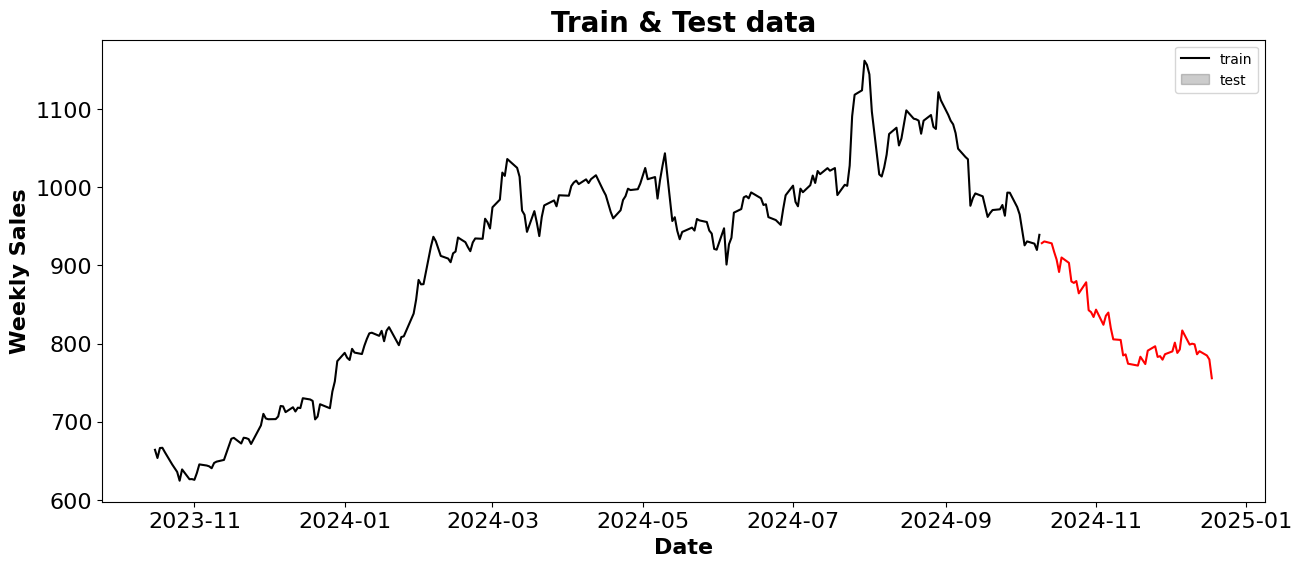

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:241], y = close_stock['close'][:241], color = 'black')
sns.lineplot(x = close_stock['date'][241:], y = close_stock['close'][241:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show()


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (189, 12)
y_train:  (189,)
X_test:  (74, 12)
y_test (74,)


In [ ]:
# Biulding Model

my_model = XGBRegressor(n_estimators=10000)
my_model.fit(X_train, y_train, verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.0662238564280957
Root Mean squared Error - RMSE : 0.08517432984602763


In [ ]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (189, 1)
Test data prediction: (74, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (289, 1)
Test predicted data:  (289, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)


[ 1  2  3  4  5  6  7  8  9 10 11 12]
[13 14 15 16 17 18 19 20 21 22]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

In [ ]:
data.tail()

,date,open,close,high,low,volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
2443,2024-12-12,799.200012,786.349976,802.000000,785.5,10602758,800.567537,48.079297,789.139996,810.953183,767.326810,17.089286
2444,2024-12-13,789.000000,790.299988,792.500000,775.0,14101869,799.589675,47.361816,789.342496,811.117881,767.567111,17.157144
2445,2024-12-16,791.400024,784.799988,793.950012,783.0,10015361,798.181133,50.808619,789.867496,810.597032,769.137959,16.392861
2446,2024-12-17,785.500000,779.750000,796.349976,778.0,10270253,796.425787,48.180239,790.259994,809.821464,770.698525,16.789285
2447,2024-12-18,774.000000,755.700012,774.250000,754.0,19085263,792.547142,41.200449,788.884994,813.697254,764.072735,17.196429
